In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('classic')

%load_ext autoreload

%autoreload 2

In [2]:
root_folder = Path.cwd().parent.parent
data_folder = Path(root_folder).joinpath('data', 'external')

In [3]:
from src.data.task_1_food_security.dataset import Dataset

In [4]:
ds = Dataset(root_folder=root_folder)

ds.prepare_dataset_array()

In [5]:
x_train = ds.X_train_flat
y_train = ds.y_train_sev


In [11]:
from xgboost import XGBRegressor

def get_regressor():
    return XGBRegressor()

def grid_search(x_train, y_train):

    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)
    # create model


    param_grid = dict()
    model = get_regressor()
    param_grid = {'max_depth': [2, 4, 6, 10, 20, 50],
                  'n_estimators': [50, 100, 200]}
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        verbose=1,
                        n_jobs=1,
                        scoring='neg_root_mean_squared_error')


    grid_result = grid.fit(x_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [12]:
grid_result_severity = grid_search(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: -0.413111 using {'max_depth': 4, 'n_estimators': 100}
-0.425298 (0.119294) with: {'max_depth': 2, 'n_estimators': 50}
-0.429397 (0.116615) with: {'max_depth': 2, 'n_estimators': 100}
-0.430412 (0.116356) with: {'max_depth': 2, 'n_estimators': 200}
-0.413119 (0.112771) with: {'max_depth': 4, 'n_estimators': 50}
-0.413111 (0.112713) with: {'max_depth': 4, 'n_estimators': 100}
-0.413111 (0.112713) with: {'max_depth': 4, 'n_estimators': 200}
-0.417368 (0.131262) with: {'max_depth': 6, 'n_estimators': 50}
-0.417367 (0.131262) with: {'max_depth': 6, 'n_estimators': 100}
-0.417367 (0.131262) with: {'max_depth': 6, 'n_estimators': 200}
-0.420326 (0.119597) with: {'max_depth': 10, 'n_estimators': 50}
-0.420326 (0.119597) with: {'max_depth': 10, 'n_estimators': 100}
-0.420326 (0.119597) with: {'max_depth': 10, 'n_estimators': 200}
-0.413763 (0.122418) with: {'max_depth': 20, 'n_estimators': 50}
-0.413763 (0.122417) with: {'max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.5s finished
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/xgboost/data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [13]:
grid_result_severity.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [14]:
grid_result_severity.best_score_

-0.4131110731036527

In [15]:
x_test = ds.X_test_flat
grid_result_severity.score(x_test, ds.y_test_sev)

-0.36721446282922565

In [16]:
grid_result_severity.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [17]:
grid_result_severity.best_score_

-0.4131110731036527

In [18]:
x_test = ds.X_test_flat
grid_result_severity.score(x_test, ds.y_test_sev)

-0.36721446282922565

In [20]:
pred = grid_result_severity.best_estimator_.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(ds.y_test_sev, pred, squared=False)

0.36721446282922565

0      False
1      False
2      False
3      False
4      False
       ...  
292     True
293     True
294     True
295     True
296     True
Name: season, Length: 297, dtype: bool

In [25]:
df_unit = ds.save_predicted(pred, "xgboost")

<AxesSubplot:>

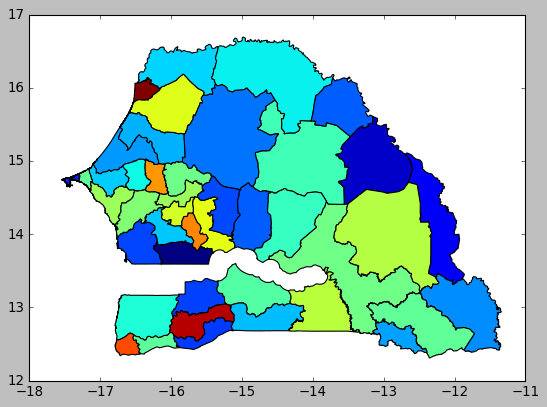

In [26]:
df_unit.plot("severity_xgboost")

## Predict proportion of population

In [37]:
# x_train is same

# get the proportions
grid_res = {}
for i in range(5):
    y_train = ds.y_train_perc[:,i]
    gr = grid_search(x_train, y_train)
    grid_res[str(i)] = gr

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: -0.017972 using {'max_depth': 2, 'n_estimators': 50}
-0.017972 (0.003435) with: {'max_depth': 2, 'n_estimators': 50}
-0.018489 (0.003708) with: {'max_depth': 2, 'n_estimators': 100}
-0.018583 (0.003761) with: {'max_depth': 2, 'n_estimators': 200}
-0.018505 (0.004346) with: {'max_depth': 4, 'n_estimators': 50}
-0.018508 (0.004348) with: {'max_depth': 4, 'n_estimators': 100}
-0.018508 (0.004348) with: {'max_depth': 4, 'n_estimators': 200}
-0.018129 (0.002602) with: {'max_depth': 6, 'n_estimators': 50}
-0.018129 (0.002602) with: {'max_depth': 6, 'n_estimators': 100}
-0.018129 (0.002602) with: {'max_depth': 6, 'n_estimators': 200}
-0.018970 (0.003831) with: {'max_depth': 10, 'n_estimators': 50}
-0.018970 (0.003831) with: {'max_depth': 10, 'n_estimators': 100}
-0.018970 (0.003831) with: {'max_depth': 10, 'n_estimators': 200}
-0.018965 (0.002849) with: {'max_depth': 20, 'n_estimators': 50}
-0.018965 (0.002849) with: {'max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   18.1s finished
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/xgboost/data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   24.3s finished
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/xgboost/data.py:106: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of

In [50]:
sample2region = ds.df_sample_year_location.copy()
sample2region.head(1)

,sample,season,adm2_name_code
0,0,2013,0


In [56]:
sample_train = sample2region.iloc[ds.idx_train]
sample_test = sample2region.iloc[ds.idx_test]

In [58]:
sample_train.head()

,sample,season,adm2_name_code
266,266,2018,41
37,37,2013,37
16,16,2013,16
253,253,2018,28
144,144,2016,9


In [59]:
grid_res

{'0': GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_para

In [79]:
sample_test


,sample,season,adm2_name_code
167,167,2016,32
211,211,2017,31
63,63,2014,18
154,154,2016,19
5,5,2013,5
...,...,...,...
15,15,2013,15
10,10,2013,10
228,228,2018,3
184,184,2017,4


In [84]:
df_pred = sample_test.copy()
df_pred['value'] = pred
df_pred['variable'] = 'xgboost'

In [90]:
df_train = sample_train.copy()
df_train['value'] = y_train
df_train['variable'] = 'train'

In [91]:
df_gt = sample_test.copy()
df_gt['value'] = ds.y_test_sev
df_gt['variable'] = 'ground_truth'

df = pd.concat([df_pred, df_train, df_gt])

In [93]:
import seaborn as sns

In [94]:
df.head()

,sample,season,adm2_name_code,value,variable
167,167,2016,32,1.883430,xgboost
211,211,2017,31,1.270132,xgboost
63,63,2014,18,1.277851,xgboost
154,154,2016,19,1.322494,xgboost
5,5,2013,5,1.364604,xgboost


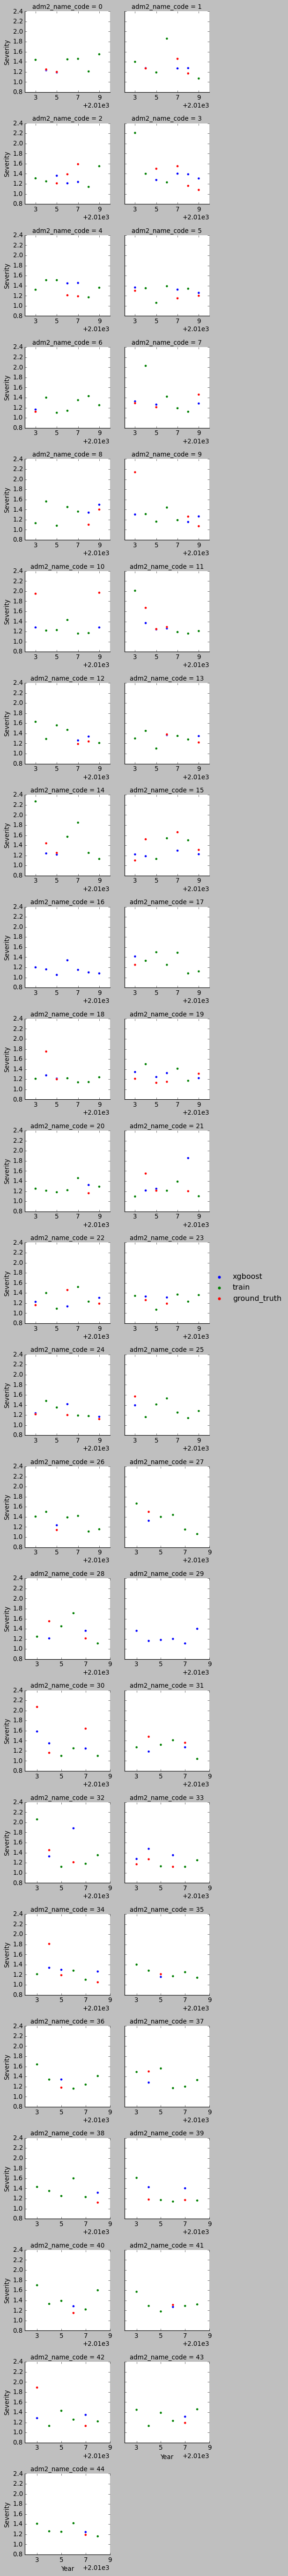

In [103]:
g = sns.FacetGrid(data=df, col='adm2_name_code', col_wrap=2, sharex=False)
g.map(sns.scatterplot, 'season', 'value', 'variable')
g.add_legend()
g.set_xlabels('Year')
g.set_ylabels('Severity')
g.set(xticks=[2013, 2015, 2017, 2019])

In [ ]:
regr = XGBRegressor()
